In [1362]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('bank-full.csv', header=0,sep=';')


ดึงข้อมูล Dataset จาก Bank-full.csv โดยมีตัวแยก sep=';' ในการแยกคอลัมน์ของข้อมูล

In [1363]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

# Data Exploration


In [1364]:
categorical_feature = list(df.select_dtypes('object').columns)
categorical_feature.remove('y')
numeric_feature = list(df.select_dtypes('int64').columns)

print("Categorical Features : " + str(len(categorical_feature)) + "\nNumerical Features   : " + str(len(numeric_feature)))
df.head()


Categorical Features : 9
Numerical Features   : 7


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


ข้อมูล Dataframe ที่ได้พบว่าข้อมูลมี Attribute ทั้งหมด 16 Features ประกอบไปด้วยข้อมูลประเภท Categorical 9 Features 
และแบบ Numerical Feature 7 Features 
        โดยที่มี Output variable คือ 'y' หรือ การ subscribe term deposit ของลูกค้า  
        



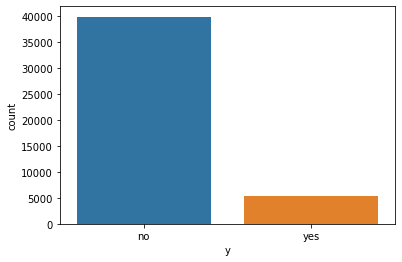

no     39922
yes     5289
Name: y, dtype: int64
Percentage of yes :0.11698480458295547
Percentage of no :0.8830151954170445


In [1365]:
sns.countplot(x="y",data=df)
plt.show()
print(df['y'].value_counts())
print("Percentage of yes :" + str(len(df[df['y']=='yes'])/len(df['y'])))
print("Percentage of no :" + str(len(df[df['y']=='no'])/len(df['y'])))

เมื่อสังเกตข้อมูลจาก Output variable พบว่าอัตราส่วนของข้อมูลทั้งสองประเภทมีความแตกต่างกันมาก เกิดเป็น Imbalance ของทั้งสอง Class


In [1366]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


จากข้อมูลที่ได้พบว่าคนส่วนใหญ่ที่ใช้บริการมีอายุเฉลี่ยอยู่ที่ประมาณ 41 และคนส่วนใหญ่มีเงินเฉลี่ย 1362 และเมื่อดูจากข้อมูล pdays พบว่าส่วนใหญ่ไม่ได้มีการติดต่อกับธนาคารเลย


In [1367]:
for i in categorical_feature:
    print("Unique data of " + i + " : " + str(len(df[i].unique())))

Unique data of job : 12
Unique data of marital : 3
Unique data of education : 4
Unique data of default : 2
Unique data of housing : 2
Unique data of loan : 2
Unique data of contact : 3
Unique data of month : 12
Unique data of poutcome : 4


จากข้อมูลจะพบว่าไม่มีข้อมูลประเภท Categorical ใดๆ ที่ประกอบไปด้วยคลาสเพียงคลาสเดียวภายใน features

In [1368]:
#check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

ข้อมูลไม่มีค่า missing value หรือ null

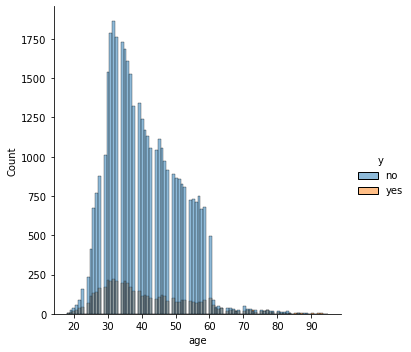

In [1369]:
sns.displot(x=df['age'],hue=df['y'])

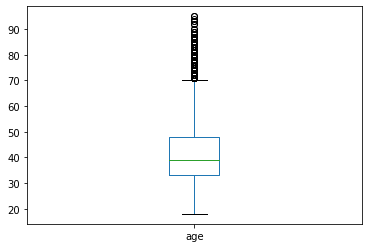

In [1370]:
plot_boxplot(df,'age')

จากข้อมูลจะพบว่าคนส่วนใหญ่ที่มาใช้บริการจะมีอายุอยู่ในช่วง 30 - 40 ปี และเมื่อสังเกตุจากกราฟบนจะพบว่าเมื่อผู้ใช้งานมีอายุที่เพิ่มสูงตั้งแต่ 60 ปีขึ้นจะมีอัตราการตอบตกลงในสัดส่วนที่มากกว่า

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64
client was not previously contacted : 0.8173674548229414


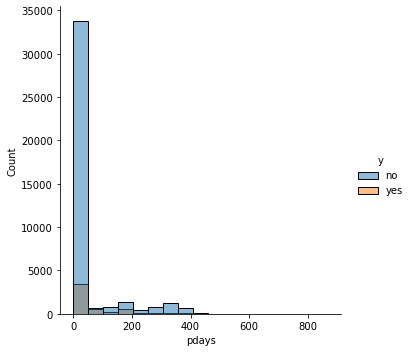

In [1371]:
sns.displot(x=df['pdays'],hue=df['y'])
print(df['pdays'].value_counts())
print("client was not previously contacted : " + str(36954/len(df)))

จากข้อมูล pdays พบว่าคนส่วนใหญ่ไม่มีการติดต่อกับธนาคารซึ่งมีค่ามากถึง 81.7% จากข้อมูลทั้งหมด

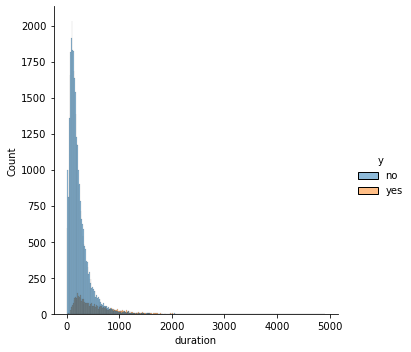

In [1372]:
sns.displot(x=df['duration'],hue=df['y'])

จากกราฟ Duration จะสามารถสังเกตุได้ว่าเมื่อ Duration มีค่าเท่ากับ 0 Output Variable จะสามารถระบุได้ว่าตอบ ไม่ โดยทันที และเมื่อมีระยะเวลาในการคุยที่มากขึ้นโอกาสที่ client จะตอบตกลงมากขึ้นเทียบกับอัตราส่วนจำนวนของข้อมูล

จากกราฟจะเห็นได้ว่าข้อมูล Day ไม่ว่าจะมีค่าเท่าใดก็ตาม จะมี Output variable อยุ่ในค่าที่ใกล้เคียงกันทุกค่า จึงอาจจะสรุปได้ว่าค่า Day ไม่ได้ส่งผลต่อค่า Output จึงอาจจะสามารถตัด Feature นี้ออกได้

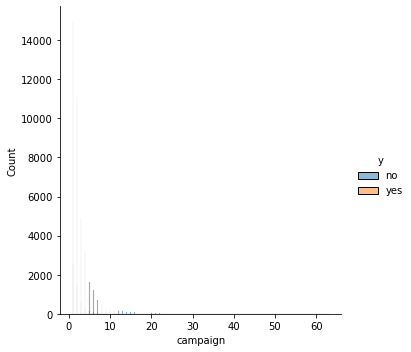

In [1373]:
sns.displot(x=df['campaign'],hue=df['y'])

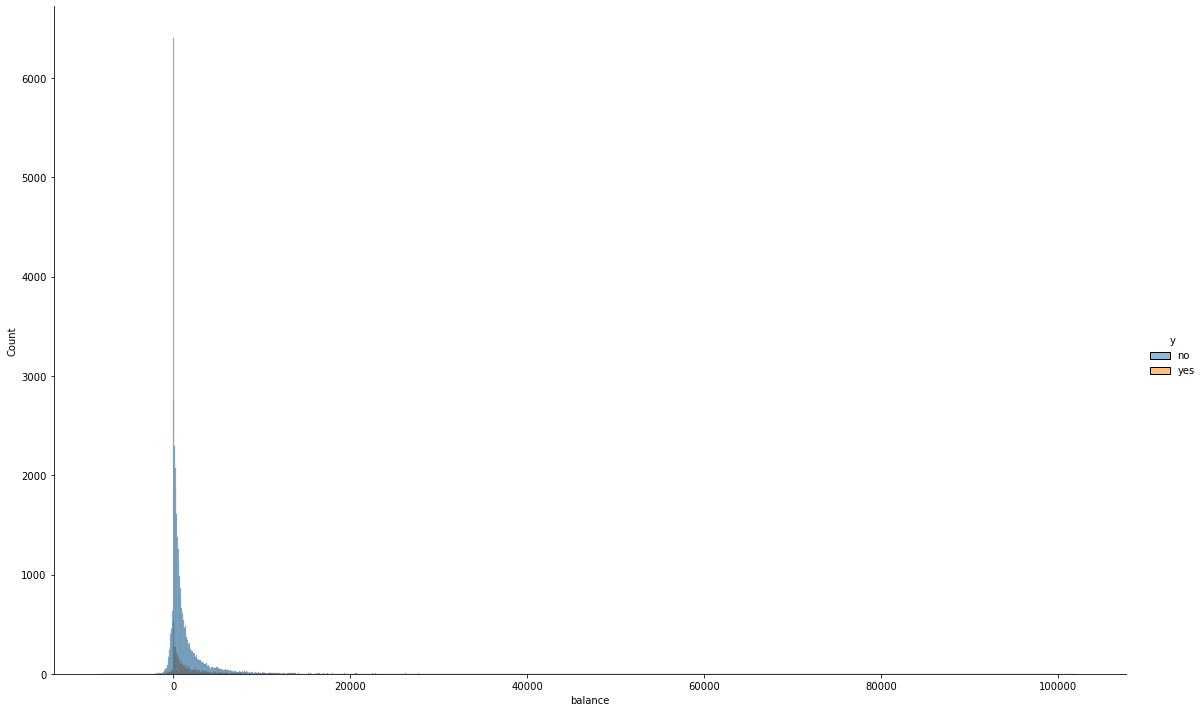

In [1374]:
sns.displot(x=df['balance'],hue=df['y'], height=10, aspect=1.6)

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

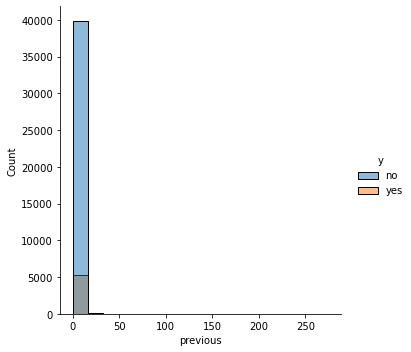

In [1375]:
sns.displot(x=df['previous'],hue=df['y'])
df['previous'].value_counts()

จากข้อมูลจะสรุปได้ว่า คนส่วนใหญ่ไม่ได้มีการติดต่อกับธนาคาร

c:\Users\66961\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


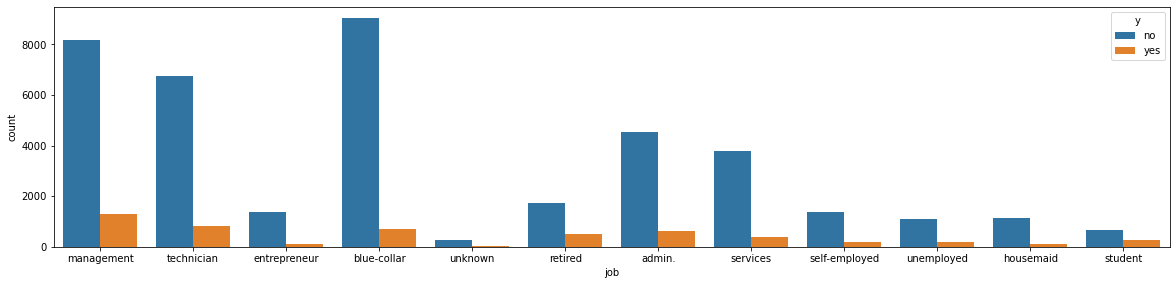

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [1376]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.countplot(df['job'],hue=df['y'])
plt.show()
df['job'].value_counts()

จากข้อมูลจะพบว่าลูกค้าส่วนใหญ่ทำงาน ประเภท blue-collar และ management โดยที่อาชีพที่ส่วนใหญ่จะตอบตกลงสูงเมื่อเทียบกับอัตราส่วนของข้อมูลแล้วพบว่า retired และ management มีอัตราการตอบตกลงมากที่สุด

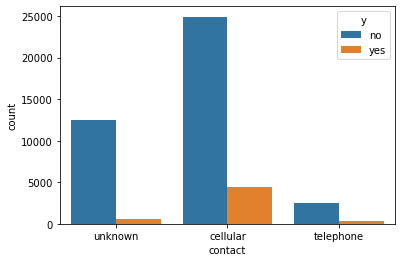

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [1377]:
sns.countplot(x="contact",hue="y",data=df)
plt.show()
df['contact'].value_counts()

จากกราฟจะพบได้ว่าคนส่วนใหญ่ใช้ Cellular contact ในการติดต่อมากที่สุดและยังเป็นกลุ่มคนที่เลือกตอบตกลงมากที่สุดเมื่อเทียบกับคนที่ใช้การติดต่อแบบอื่นๆ Feature จึงเป็น feature ที่ดีที่จะสามารถนำไปใช้ในการฝึกโมเดลได้

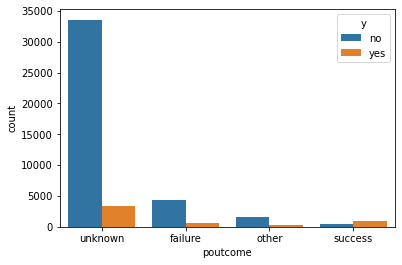

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [1378]:
sns.countplot(x="poutcome",hue="y",data=df)
plt.show()
df['poutcome'].value_counts()

จากกราฟ poutcome เมื่อจะเห็นได้ว่าข้อมูลส่วนใหญ่เป็น unknown หรือค่าที่ไม่รู้แต่หากสังเกตุจากข้อมูลของลูกค้าที่ Success จะพบว่าเกินครึ่งที่ตอบตกลงดังนี้น Feature นี้ก็จะเป็นหนึ่งในตัวเลือกที่ดีสำหรับการนำไปฝึกโมเดล 

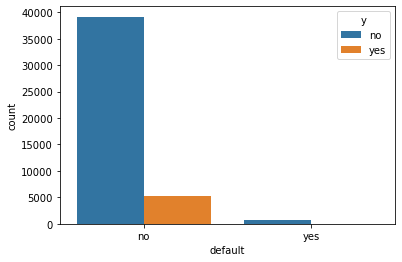

no     44396
yes      815
Name: default, dtype: int64

In [1379]:
sns.countplot(x="default",hue="y",data=df)
plt.show()
df['default'].value_counts()

จากข้อมูลนี้จะพบว่าคนส่วนใหญ่ไม่มีเครดิต และเมื่อสังเกตุจากอัตราส่วนของข้อมูลแล้วพบว่า Feature นี้ไม่ได้ส่งผลเป็นพิเศษต่อ Output 

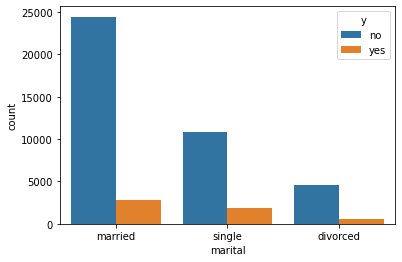

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [1380]:
sns.countplot(x="marital",hue="y",data=df)
plt.show()
df['marital'].value_counts()

จากการสังเกตุกราฟจะพบว่าคนที่มีสถานะ โสด จะมีโอกาสในการตอบตกลงมากกว่าสถานะอื่น ๆ เมื่อเปรียบเทียบกับจำนวนของข้อมูล

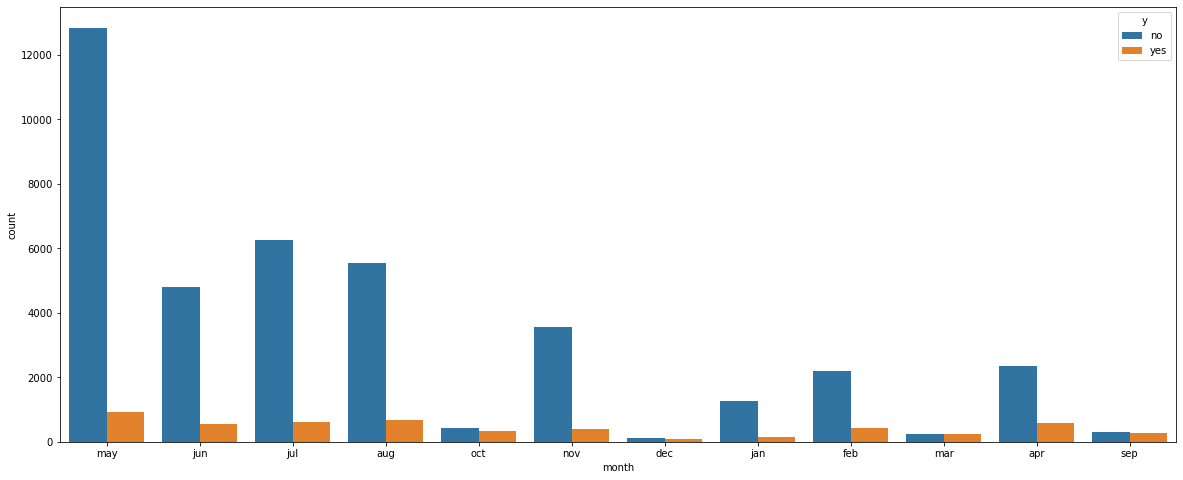

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [1381]:
plt.figure(figsize=(20,8))
sns.countplot(x="month",hue="y",data=df)
plt.show()
df['month'].value_counts()


จากกราฟ ในช่วงเดือนที่มีการติดต่อมากที่สุดจะอยู่ในช่วงเดือน พฤษภาคม และมีการติดต่อน้อยที่สุดอยู่ในช่วงเดือนธีนวาคม และเมื่อสังเกตุจากจำนวนของข้อมูลในแต่ละเดือนเทียบกับอัตราการตอบตกลง พบว่า เดือนกันยายน และ เดือน มีนาคม โอกาสในการตอบตกลงมากที่สุด

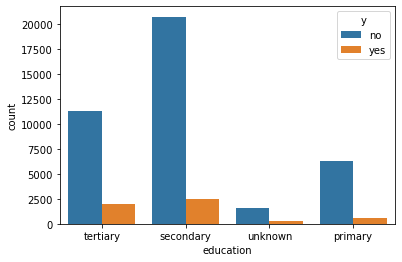

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [1382]:
sns.countplot(x="education",hue="y",data=df)
plt.show()
df['education'].value_counts()

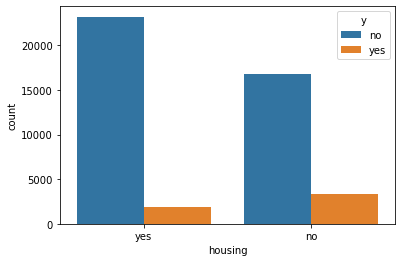

yes    25130
no     20081
Name: housing, dtype: int64

In [1383]:
sns.countplot(x="housing",hue="y",data=df)
plt.show()
df['housing'].value_counts()

จากข้อมูล housing พบว่าคนที่ไม่มีหนี้บ้านจะมีโอกาสที่จะยอมรับข้อตกลงมากกว่าคนที่มีหนี้บ้าน

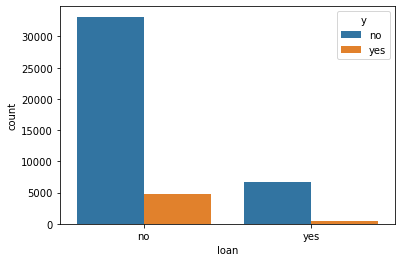

Percentage of no loan to  'y' = yes : 0.12655727342165565
Percentage of yes loan to 'y' = yes : 0.06681391496410823


In [1384]:
sns.countplot(x="loan",hue="y",data=df)
plt.show()
df['loan'].value_counts()


print("Percentage of no loan to  'y' = yes : "+str(len(df.loc[(df['loan'] == 'no') & (df['y'] == 'yes')])/len(df.loc[(df['loan'] == 'no')])))
print("Percentage of yes loan to 'y' = yes : "+str(len(df.loc[(df['loan'] == 'yes') & (df['y'] == 'yes')])/len(df.loc[(df['loan'] == 'yes')])))

จากข้อมูลกราฟและอัตราส่วนของข้อมูลจะสามารถสรุปได้ว่าคนที่ไม่มีหนี้จะตอบตกลงมากกว่าคนที่มีหนี้

In [1385]:
#sns.pairplot(df,hue='y')

<AxesSubplot:>

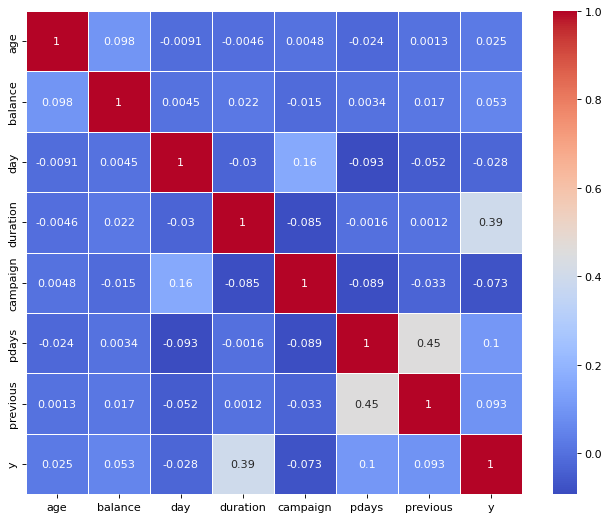

In [1386]:
plt.figure(figsize=(10,8),dpi=80)
df2 = df
df2['y'] = df2['y'].replace(['yes','no'], [1,0])
heatmap = df2[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','y']]
#heatmap.corr

sns.heatmap(heatmap.corr(),cmap="coolwarm",annot=True,linewidth=0.5)

จาก Heatmap พบว่า feature pdays และ previous มีความ correlate กันสูงถึง 45% 
และเมื่อพบว่า Duration เป็น feature ที่มีความ correlate กับ y หรือ Output variable มากที่สุด

โดยสรุป feature ที่จะทำการเก็บไว้คือ   
***
Feature = ['age','pdays','month','poutcome','housing','marital','balance','contact','job','education']

# Preprocess


สร้างดาต้าเฟรมที่จะใช้สำหรับการ Preprocessing ชื่อ df_clean และทำการดรอป column ที่ไม่จำเป็น

In [1387]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing


df = df.drop_duplicates()

df_original = df.copy()
df_clean = df.copy()

df_clean = df_clean.drop(columns=['duration','campaign','default','loan','day','previous'],axis=1)

เปลี่ยนค่า Unknown ของ job และ education โดยใช้ฐานนิยม 

In [1388]:
df_clean['job'].replace(['unknown'],df['job'].mode(),inplace=True)
df_clean['education'].replace(['unknown'],df['education'].mode(),inplace=True)


แบ่งข้อมูลออกเป็นสองส่วน เป็น X ที่จะใช้สำหรับเก็บข้อมูล feature และ Y ที่เก็บข้อมูล Output variable จาก Dataframe ที่ใช้สำหรับการ Preprocess


In [1389]:
X = df_clean.loc[:, df_clean.columns!='y']
Y = df_clean.loc[:, df_clean.columns=='y']

In [1390]:
X_original = df_original.loc[:, df_original.columns!='y']
Y_original = df_original.loc[:, df_original.columns=='y']

ใช้ StandardScaler ในการ scale ค่า numeric ทั้งหมดให้อยู่ในเสกลเดียวกัน

In [1391]:
scaler = preprocessing.StandardScaler()
numeric_feature = list(X.select_dtypes('int64').columns)
scaler.fit(X[numeric_feature])
X[numeric_feature] = scaler.transform(X[numeric_feature])

C:\Users\66961\AppData\Local\Temp\ipykernel_21420\2325025502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_feature] = scaler.transform(X[numeric_feature])


ใช้ One-hot encoding ในการแปลงค่าจาก Categorical ให้กลายเป็นแบบ Boolean ของแต่ละประเภทใน feature เพื่อให้สามารถใช้ใน model ได้

In [1392]:
X = pd.get_dummies(X,drop_first=True)
X_original = pd.get_dummies(X_original,drop_first=True)

In [1393]:
X = X.drop(columns=['poutcome_unknown'],axis=1)

ทำการ drop column 'poutcome_unknown' ที่เก็บค่า unknown ของ poutcome ไว้เป็นจำนวนมาก

In [1394]:
test_size = 0.3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=3)

แบ่งข้อมูลออกเป็น train สำหรับใช้ในโมเดล และ test สำหรับการตรวจสอบผลลัพธ์ที่ได้

In [1395]:
x_train_original, x_test_original, y_train_original, y_test_original = train_test_split(X_original, Y_original, test_size=test_size, random_state=3)

In [1396]:
print(y_train.value_counts())
print(y_train_original.value_counts())

y
0    27953
1     3694
dtype: int64
y
0    27953
1     3694
dtype: int64


ใช้ฟังชันก์ SMOTE ในการเพิ่ม Sample ของข้อมูลที่จะใช้สำหรับการ train model เพื่อลดปัญหาที่เกิดขึ้นจาก Imbalance class ของ Dataset

In [1397]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote , y_train_smote= smote.fit_sample(x_train,y_train)

ตรวจสอบค่า Sample ที่ได้จากการเพิ่ม Sample ของข้อมูลสำหรับการเทรนโมเดล

In [1398]:
y_train_smote.value_counts()

y
0    27953
1    27953
dtype: int64

# Model and Training


จากนั้นเราก็ได้ทำการสร้างตัว model ของ LogisticReression มา 3 ตัว 

In [1399]:
clf = LogisticRegression()
clf2 = LogisticRegression()
clf3 = LogisticRegression()

และทำการ train model ด้วย data ที่ต่างกัน 3 รุปแบบ ดังต่อไปนี้
1. data ที่ผ่านการ preprossing
2. data ที่ผ่านการ preprossing และ oversample โดยใช้ smote
3. data ที่เริ่มต้นที่ผ่านการทำ OneHotEncoding

In [1400]:
clf.fit(x_train,y_train)
clf2.fit(x_train_smote, y_train_smote)
clf3.fit(x_train_original,y_train_original)

c:\Users\66961\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\66961\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\66961\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\66961\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

LogisticRegression()

หลังจากนั้นนำ model ที่ได้ มาทำการ predict ผล

In [1401]:
y_pred = clf.predict(x_test)
y_pred_smote = clf2.predict(x_test)
y_pred_original = clf3.predict(x_test_original)

# Result Analysis

ผลที่ได้มาวิเคราห์โดยทำการวิเคราะห์ผ่าน confusion_matrix โดยเราจะคำนึงถึงค่าตัว recall ของคนที่ตอบตกลงเป็นหลัก  เพราะเราต้องการที่จะหาคนที่ตอบตกลงกับเราให้ได้มากที่สุด

In [1402]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(y_test_original,y_pred_original)
cm

array([[11765,   204],
       [ 1307,   288]], dtype=int64)

In [1403]:
print("Classification Report Benchmark Dataset with duration\n ", classification_report(y_test_original, y_pred_original))

Classification Report Benchmark Dataset with duration
                precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.59      0.18      0.28      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



โดยเราจะนำข้อมูลผลจาก Benchmark model มาเป็นตัวตั้งต้นในการวิเคราะห์ ถ้าเราทำการ train ตัว model ที่ผ่านการ data preprossing มาเราก็ควรที่จะได้ค่า recall ที่ดีกว่าตัว Benchmark

In [1404]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11848,   121],
       [ 1327,   268]], dtype=int64)

In [1405]:
print("Classification Report Prepocessing without SMOTE:\n ", classification_report(y_test, y_pred))

Classification Report Prepocessing without SMOTE:
                precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.69      0.17      0.27      1595

    accuracy                           0.89     13564
   macro avg       0.79      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



โดยจากผลลัพธ์ของ model ที่ผ่านการ Prepocessing มาโดยยังไม่ได้ผ่าน Smote เราจะได้ recall ของคนที่ตอบตกลง อยู่ที่ 0.17 ซึ่งปัญหานี้เกิดจาก imbalance class ของ dataset ซึ่งจะทำให้ model พยายาม predict ว่าเป็น class 0 มากกว่า class 1 ซึ่งปัญหานี้อาจจะทำให้เรามีโอกาสเสียลูกค้าที่ตอบตกลงได้เนื่องจากมี recall ที่ต่ำ

In [1406]:
cm = confusion_matrix(y_test,y_pred_smote)
cm

array([[9534, 2435],
       [ 713,  882]], dtype=int64)

In [1407]:
print("Classification Report Prepocessing with SMOTE:\n ", classification_report(y_test, y_pred_smote))

Classification Report Prepocessing with SMOTE:
                precision    recall  f1-score   support

           0       0.93      0.80      0.86     11969
           1       0.27      0.55      0.36      1595

    accuracy                           0.77     13564
   macro avg       0.60      0.67      0.61     13564
weighted avg       0.85      0.77      0.80     13564



โดยจากผลลัพธ์ของ model ที่ผ่านการ Prepocessing และผ่านทำ Smote เราจะได้ recall ของคนที่ตอบตกลงอยู่ที่ประมาณ 0.5 ซึ่งมีค่าเพิ่มขึ้นมาก 
ถึงแม้ว่าตัว recall ของคนที่ปฏิเสธจะลดลงด้วยก็ตาม แต่สิ่งที่ได้มา ทำให้เรามีโอกาสได้ลูกค้าที่มากขึ้นนับเป็นการ trade-off อย่างนึง